# PHYS 411 - Homework 10
Due Tuesday November 22, 2022 at 9:30.

You can use these buttons below to launch this Jupyter notebook in either [binder](https://mybinder.org/) or [Colab](https://colab.research.google.com/).

[![Open in Binder](https://mybinder.org/badge_logo.svg)](http://beta.mybinder.org/v2/gh/mgrau/phys411/main?urlpath=%2Ftree/Homework%2010.ipynb)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mgrau/phys411/blob/main/Homework%2010.ipynb)

When you are finished with your work, please either print to a PDF file and submit via canvas, or submit the raw Jupyter notebook file. For full credit please be sure to clearly explain what you are doing.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 1 - Penning Traps
An electron is in a Penning Trap, with a measured cyclotron frequency is $\bar{f}_c = 149.011$ GHz, the measured axial oscillation frequency is $\bar{f}_z = 599$ MHz, and the measured electron spin flip frequency is $\bar{f}_s = 149.185$ GHz.

1. Use the Brown-Gabrielse Invariance theorem to calculate the electron $g$-factor, $g_s$.
2. Assume the magnetron frequency is about 100 kHz. What is the size of the effect of neglecting this in the calculation of $g_s$?
3. What is the amplitiude of the magnetic field?

# Problem 2 - Paul Traps
The equations of motion in the Paul trap are described by the Mathieu equation,
$$
\frac{d^2 x}{dt^2} + (a - 2q \cos(2 t)) x = 0
$$
I have a function `mathieu(t, a, q)` that will solve this ODE as a function of t for values of parameters a and q. Plot the motion of an ion in a Paul trap for the various parameters:
1. $q = 0.3$, $a=0$
2. $q = 0.3$, $a=-0.03$
3. $q = 0.3$, $a=-0.05$
4. $q = 0.8$, $a=0.1$,
5. $q = 0.8$, $a=0.14$.

For a singly-charged calcium ion, in an ion trap with an approximate ion-electrode distance of $r_0 = 1$ mm, what does the trap voltage $V_\text{rf}$ need to be if the RF frequency is to be $\Omega_\text{rf} = 2\pi \times 40$ MHz? What is the secular oscillation frequency in the trap of the ion when $q=0.3$ and $a=0$?

In [2]:
from scipy.integrate import solve_ivp

def mathieu(t, a, q):
    def dx(t, x, a, q):
        return np.array([x[1], -(a-2*q*np.cos(2*t))*x[0]])
    sol = solve_ivp(dx, [np.min(t), np.max(t)], [0, 0.1], args=(a, q), t_eval=t, method='DOP853')
    return sol.y[0,:]

Text(0.5, 0, 't $(2/\\Omega)$')

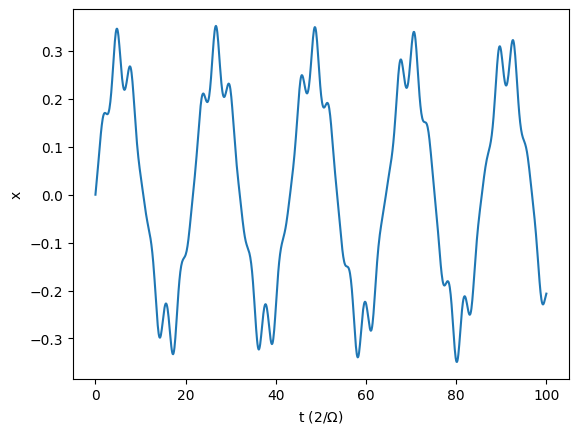

In [3]:
t = np.linspace(0, 100, 1000)
plt.plot(t, mathieu(t, 0, 0.4))
plt.ylabel('x')
plt.xlabel('t $(2/\Omega)$')

# Problem 3 - Paul Trap Stability
The $a$ parameters for the equations in a Paul trap for the $x$ motion and $y$ motion are the same value in magnitude, but opposite in sign. The motion in the trap is stable if the amplitude of $x$ and $y$ motion over time remains finite. I have written a function `stable(a, q)` that evaluates if the ion trap motion is stable for a pair of parameters $(a, q)$. 

Numerically evaluate the stability of the ion trap for the range of paramters $a=-0.3$ to $a=0.3$ and $q=0$ to $q=1.0$, and plot the stability of the trap on a figure with an $x$-axis of $q$ and $y$-axis of $a$.

In [4]:
@np.vectorize
def stable(a, q):
    t = np.linspace(0, 100, 100)
    x = mathieu(t, a, q)
    y = mathieu(t, -a, q)
    return np.max(np.abs(x))<100 and np.max(np.abs(y))<100